# Predicting Vehicle Popularity by Features

_by Douglas Hundley_

___

### Contents:
- [Problem Statement](#Problem-Statement)
- [Assumptions](#Assumptions)
- [Data Dictionary](#Data-Dictionary)
- [Data Cleaning](#Data-Cleaning)
- [Visualizing the Data](#Visualizing-the-Data)
- [Modeling](#Modeling)
- [Model Evaluation and Analysis](#Model-Evaluation-and-Analysis)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

___

### Problem Statement
I am working for General Makers who is developing a new car. My goal is to predict the popularity of the car if it goes to the market and also to help identify what features make a car popular. In order to do this I will be cleaning the dataset shown below and using regression models for my predictions. I will gauge success by creating a predictive model that has atleast an 80 percent R2 score and beats the null model in RMSE. 

## Assumptions

I am assuming popularity is relevant to the volume of sales. 


___

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**make**|*object*|cars.csv|The car manufacturer|
|**model**|*object*|cars.csv|Model of the car|
|**engine_fuel_type**|*object*|cars.csv|Type of fuel the car takes|
|**engine_hp**|*float*|cars.csv|Car Horsepower|
|**engine_cylinders**|*integer*|cars.csv|Number of cylinders|
|**transmission_type**|*object*|cars.csv|Transmission type of car|
|**driven_wheels**|*object*|cars.csv|Drive type of car|
|**number_of_doors**|*float*|cars.csv|Total count of words in title column|
|**market_category**|*object*|cars.csv|Marketing type of car|
|**vehicle_size**|*object*|cars.csv|Size type of car|
|**vehicle_style**|*object*|cars.csv|Style of car|
|**highway_mpg**|*integer*|cars.csv|Highway miles per gallon|
|**city_mpg**|*integer*|cars.csv|City miles per gallon|
|**popularity**|*integer*|cars.csv|Popularity rating of car|
|**msrp**|*integer*|cars.csv|Manufacturer suggested retail price|

___

## Data Cleaning

### Imports

In [1]:
"""This cell contains all imports needed for this notebook"""
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from collections import Counter
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

To start off I am going to read in my dataset and check it for missing values. 

In [2]:
# reading in csv
df = pd.read_csv("cars.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [4]:
# checking data types
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
Highway MPG            int64
City MPG               int64
Popularity             int64
MSRP                   int64
dtype: object

In [5]:
# converts columns to snake case 
df.columns = df.columns.str.replace(' ', '_').str.lower()

Looking at the cell below it seems that the feature with the highest amount of nulls is our market_category column. Since I don't have a reasonable way to fill in the values for this column and it will create a myriad of dummy variables I will be dropping it. Also as a consumer myself I've never considered the market category when buying a vehicle.  As for the rest of the values I will be imputing them using KNNImputer except for the engine fuel type nulls which will be a simple single google search.

In [6]:
len(df.market_category.unique())

72

In [7]:
# checking null values 
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [8]:
# dropping market category feature 
df.drop('market_category', inplace=True, axis=1)

In [9]:
# checking total number of features and rows
df.shape

(11914, 15)

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


While checking through the dataframe I noticed that I had some UNKNOWN values in my transmission types. I will be dropping these 19 rows as I can not find a reasonable way to impute these missing values. 

In [11]:
# dropping unknown values
df = df[df.transmission_type != 'UNKNOWN']
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [12]:
# checking remaining values in transmission_types
df.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
Name: transmission_type, dtype: int64

A quick search on the Suzuki Verona shows that there are no special fuel requirements for this vehicle. We can safely infer that the fuel in mind for this vehicle is regular unleaded and fill in the NaN values. 

In [13]:
# checking nulls in engine fuel type 
df[df['engine_fuel_type'].isnull()]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18499


In [14]:
# filling NaN values with regular unleaded
df['engine_fuel_type'].fillna('regular unleaded', inplace=True)

Before I can impute the rest of the missing values I need to turn my columns that have string values into dummy variables. This is because like a machine learning model Imputer's cannot take in string values. To prep my data I am first going to create a data frame of just my dummy variables. Next I will create a master data frame by combining my dummy columns to my original numerical columns. 

In [15]:
# creates dataframe of dummy variables 
dummies = pd.get_dummies(df[['make', 'model', 'engine_fuel_type', 'transmission_type',
                            'driven_wheels', 'vehicle_size', 'vehicle_style']], drop_first=True)

In [16]:
# list of original columns to be dropped from master_df
drop_list = ['make', 'model', 'engine_fuel_type', 'transmission_type',
            'driven_wheels', 'vehicle_size', 'vehicle_style']

In [17]:
# creates master_df excludes columns in drop_list
master_df = pd.concat([df.drop(columns=drop_list), dummies], axis=1)

In [18]:
master_df.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,make_Alfa Romeo,make_Aston Martin,...,vehicle_style_Convertible,vehicle_style_Convertible SUV,vehicle_style_Coupe,vehicle_style_Crew Cab Pickup,vehicle_style_Extended Cab Pickup,vehicle_style_Passenger Minivan,vehicle_style_Passenger Van,vehicle_style_Regular Cab Pickup,vehicle_style_Sedan,vehicle_style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0


Now that all of my columns contain numbers I can create a new dataframe and fill in the nulls with KNNImputer. This will calculate the nulls values based off the mean of surrounding values based off the number of neighbors I enter. I have elected to keep the number of neighbors at the default of 5 as it appears to be giving the best performance. 

In [19]:
# instantiates and fits KNNImputer on data
impute_knn = KNNImputer(n_neighbors=5)
imputed_df = pd.DataFrame(impute_knn.fit_transform(master_df), columns=master_df.columns)


In [20]:
imputed_df.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,make_Alfa Romeo,make_Aston Martin,...,vehicle_style_Convertible,vehicle_style_Convertible SUV,vehicle_style_Coupe,vehicle_style_Crew Cab Pickup,vehicle_style_Extended Cab Pickup,vehicle_style_Passenger Minivan,vehicle_style_Passenger Van,vehicle_style_Regular Cab Pickup,vehicle_style_Sedan,vehicle_style_Wagon
0,2011.0,335.0,6.0,2.0,26.0,19.0,3916.0,46135.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011.0,300.0,6.0,2.0,28.0,19.0,3916.0,40650.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011.0,300.0,6.0,2.0,28.0,20.0,3916.0,36350.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011.0,230.0,6.0,2.0,28.0,18.0,3916.0,29450.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011.0,230.0,6.0,2.0,28.0,18.0,3916.0,34500.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# verifying how data was imputed
imputed_df.engine_cylinders.unique()

array([ 6. ,  4. ,  5. ,  8. , 12. ,  0. ,  6.4, 10. ,  5.2,  4.4,  3. ,
        4.8,  5.6,  4.6, 16. ])

In the cell below I am going to convert my float columns into integers. This will also round down any values that were imputed with a decimal place value. Engines do not have fractions of pistons and I do not think it is necessary to try to round up these values 


In [22]:
# turns float columns into int
for value in imputed_df:
     if imputed_df[value].dtypes == float:
        
         imputed_df[value] = imputed_df[value].astype(int)

In [23]:
# rechecking for nulls 
imputed_df.isnull().sum().sort_values()


year                   0
model_Previa           0
model_Prius            0
model_Prius Prime      0
model_Prius c          0
                      ..
model_ES 330           0
model_ES 350           0
model_EX               0
model_Dynasty          0
vehicle_style_Wagon    0
Length: 1001, dtype: int64

In [24]:
# checking previously null value 
imputed_df.loc[3717]

year                                2016
engine_hp                            115
engine_cylinders                       4
number_of_doors                        4
highway_mpg                          105
                                    ... 
vehicle_style_Passenger Minivan        0
vehicle_style_Passenger Van            0
vehicle_style_Regular Cab Pickup       0
vehicle_style_Sedan                    0
vehicle_style_Wagon                    0
Name: 3717, Length: 1001, dtype: int32

In [25]:
# checking previously null value 
imputed_df.loc[4919]

year                                2007
engine_hp                            201
engine_cylinders                       6
number_of_doors                        4
highway_mpg                           21
                                    ... 
vehicle_style_Passenger Minivan        1
vehicle_style_Passenger Van            0
vehicle_style_Regular Cab Pickup       0
vehicle_style_Sedan                    0
vehicle_style_Wagon                    0
Name: 4919, Length: 1001, dtype: int32

As I've worked with this data I noticed that I had some duplicates popping up. As duplicates will give our models problems later on I will be dropping them and only retaining one of each row. 

In [26]:
# checking for duplicated values
imputed_df.duplicated().sum()

713

In [27]:
# dropping all duplicated values
imputed_df.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True)

Here I am checking the cars that received the lowest and highest popularity. My lowest popularity is 2 and is occupied by one vehicle so I'm checking all the way up to popularity 549. I'm doing this so I can examine what the lowest popular cars might have in common.  As for my highest popularity multiple vehicles share this value at a popularity of 5657. Looking through random samples of both ends I am noticing several things. The first thing that stands out to me is I'm noticing a lot of high msrp vehicles in the lower popularity. This could be because most of the general public cannot afford cars with very high starting prices. I'm also seeing multiple oldsmobile vehicles with both low msrp and low popularity. This leads me to believe that oldsmobile is not well recieved. 

In [28]:
# checking cars with the lowest popularity 
df.loc[df['popularity'] < 549].sort_values(by="popularity").head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2116,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,18,13,2,209990
2117,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,18,13,2,219990
5202,Genesis,G80,2017,regular unleaded,311.0,6.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,28,18,21,41400
5203,Genesis,G80,2017,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,23,15,21,54550
5204,Genesis,G80,2017,regular unleaded,311.0,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,16,21,43900


In [29]:
# checking cars with the highest popularity 
df.loc[df['popularity'] == 5657].head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1331,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,Midsize,Cargo Minivan,22,16,5657,2000
1332,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,Midsize,Passenger Minivan,22,15,5657,2000
1333,Ford,Aerostar,1995,regular unleaded,155.0,6.0,AUTOMATIC,all wheel drive,3.0,Large,Passenger Minivan,18,14,5657,2000
1334,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,Large,Passenger Minivan,22,15,5657,2000
1335,Ford,Aerostar,1996,regular unleaded,140.0,6.0,AUTOMATIC,rear wheel drive,3.0,Midsize,Passenger Minivan,21,15,5657,2000


In [30]:
imputed_df.popularity.describe()

count    11182.000000
mean      1559.032284
std       1445.763634
min          2.000000
25%        549.000000
50%       1385.000000
75%       2009.000000
max       5657.000000
Name: popularity, dtype: float64

___

## Visualizing the Data

Looking at the heatmap below is does not appear that there is much correlation between our numerical features and our target variable. Typically for me to count something as highly correlated I look for the value to be atleast 0.40. Our top three correlated values appear to be year, engine_hp, and engine_cylinders.   

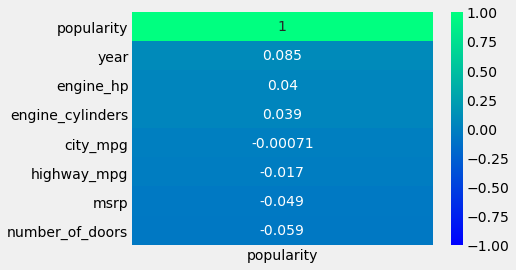

In [31]:
# provides white background for readability 
plt.style.use("fivethirtyeight")
# Checking correlation of columns 
corr_matrix = imputed_df[["year", "engine_hp", "engine_cylinders", "number_of_doors",
                  "highway_mpg", "city_mpg", "popularity", "msrp"]].corr()

# plotting correlation heatmap

ax = sns.heatmap(corr_matrix[['popularity']].sort_values(by='popularity', ascending=False),
         annot = True,
         vmin = -1,
         vmax = 1,
         cmap = 'winter'
  );

#plt.savefig('Images/heatmap.jpg', bbox_inches="tight")

In the interest of feature reduction I will be removing the model feature. I am doing this to prevent overfitting of our model. The make column alone adds 914 features to our data. 

In [32]:
imputed_df.shape

(11182, 1001)

In [33]:
# drops model columns 
imputed_df.drop(imputed_df[[col for col in imputed_df if col.startswith("model")]], inplace=True, axis=1)


In [34]:
imputed_df.shape

(11182, 87)

Looking at the chart below it appears that the majority of the cars in this dataset are roughly from 2015 through 2019

Text(0.5, 1.0, 'Distribution of years')

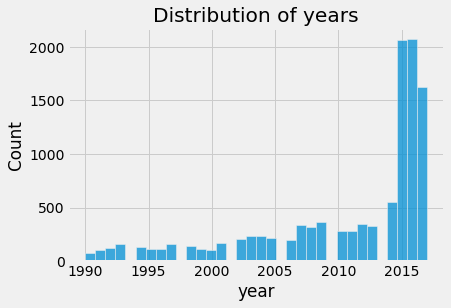

In [35]:
# hist plot of car years
sns.histplot(imputed_df.year).set_title("Distribution of years")
#plt.savefig('Images/years.jpg', bbox_inches="tight")

This chart is a quick reminder that three door cars do exist. A surprising amount of three door vehicles have the highest popularity rating associated with them. This could be because of their utility as either a family vehicle or a cargo vehicle. 

Text(0.5, 1.0, 'Distribution of doors')

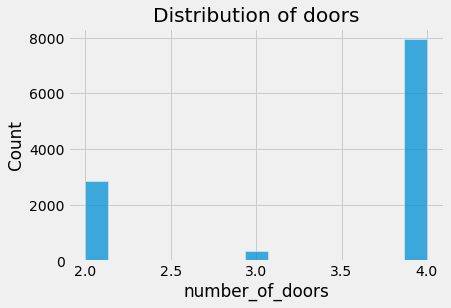

In [36]:
# hist plot of number of doors
sns.histplot(imputed_df.number_of_doors).set_title("Distribution of doors")
#plt.savefig('Images/doors.jpg')

In [37]:
imputed_df[(imputed_df['number_of_doors'] == 3) & (imputed_df['popularity'] == 5657)]

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,make_Alfa Romeo,make_Aston Martin,...,vehicle_style_Convertible,vehicle_style_Convertible SUV,vehicle_style_Coupe,vehicle_style_Crew Cab Pickup,vehicle_style_Extended Cab Pickup,vehicle_style_Passenger Minivan,vehicle_style_Passenger Van,vehicle_style_Regular Cab Pickup,vehicle_style_Sedan,vehicle_style_Wagon
1329,1995,135,6,3,22,16,5657,2000,0,0,...,0,0,0,0,0,0,0,0,0,0
1330,1995,135,6,3,22,15,5657,2000,0,0,...,0,0,0,0,0,1,0,0,0,0
1331,1995,155,6,3,18,14,5657,2000,0,0,...,0,0,0,0,0,1,0,0,0,0
1332,1995,135,6,3,22,15,5657,2000,0,0,...,0,0,0,0,0,1,0,0,0,0
1333,1996,140,6,3,21,15,5657,2000,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10719,2017,275,6,3,19,14,5657,40925,0,0,...,0,0,0,0,0,0,1,0,0,0
11408,2001,200,6,3,22,16,5657,20220,0,0,...,0,0,0,0,0,0,0,0,0,0
11409,2002,200,6,3,21,16,5657,20585,0,0,...,0,0,0,0,0,0,0,0,0,0
11410,2003,200,6,3,22,16,5657,21075,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
imputed_df[imputed_df['number_of_doors'] == 3].shape

(357, 87)

Looking at our vehicle counts it seems that most of the dataset is made up of mostly compact and Midsize vehicles. 

In [39]:
df.vehicle_size.value_counts()

Compact    4387
Midsize    4113
Large      2682
Name: vehicle_size, dtype: int64

In [40]:
len(df.make.unique())

48

In [41]:
len(df.vehicle_style.unique())

16

Looking at the chart below it seems that most of our vehicles have a horsepower between 200 and 300. This lines up with our value count of vehicle size's. Typically 200 through 300 horsepower is a common range for motorists unless they are specifically wanting a large towing vehicle or sports car. 

Text(0.5, 1.0, 'Distribution of engine_hp')

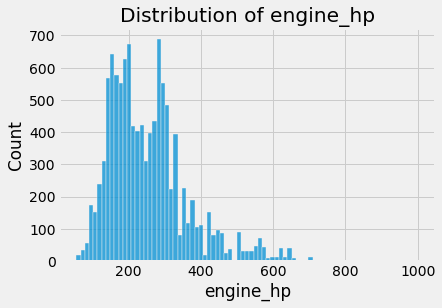

In [42]:
# hist plot of engine_hp
sns.histplot(imputed_df.engine_hp).set_title("Distribution of engine_hp")
#plt.savefig('Images/engine_hp.jpg')

Down below I'm creating a data frame of the top 2,000 most and least popular vehicles. 

In [43]:
# creating dataframe of top 2000 popular vehicles
popular = df.sort_values(by='popularity', ascending=False)[:2000]
# creating dataframe of least 2000 popular vehicles
not_popular = df.sort_values(by='popularity', ascending=True)[:2000]

This chart shows that Ford, BMW, and Audi hold the top three spots for popularity in this dataset. 

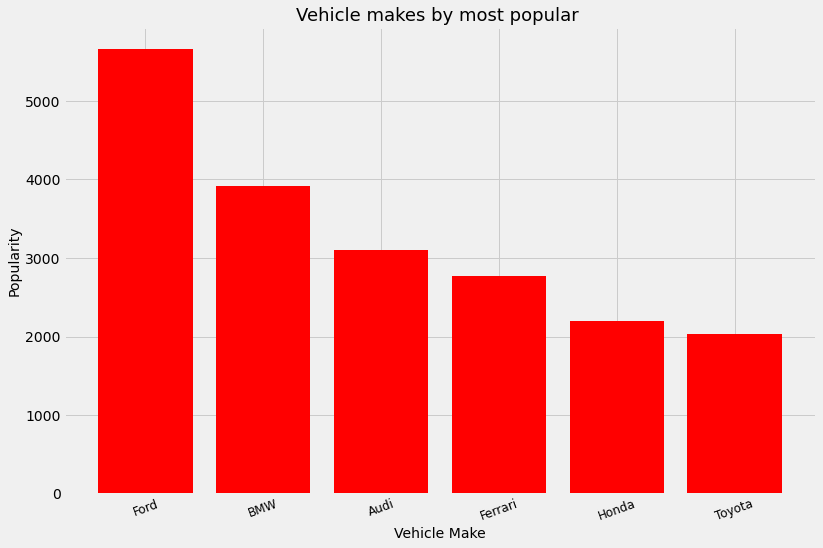

In [44]:
# chart width, height 
plt.figure(figsize=(12, 8))
#barplot
plt.bar(x =popular['make'], height = popular['popularity'], color = 'red');
#rotate tick marks
#add rotation in degrees
plt.xticks(rotation = 20, size = 12);
# title
plt.title('Vehicle makes by most popular ', size = 18);
plt.xlabel('Vehicle Make', size = 14);
plt.ylabel('Popularity', size = 14);


#plt.savefig('Images/popular_bar.jpg', bbox_inches="tight")

This chart is showing our least popular vehicles. Our top three here are Spyker, Genesis, and Oldsmobile. However we do need to note that Spyker, Genesis, and several other vehicles in this list do not have many entries in this dataset. 

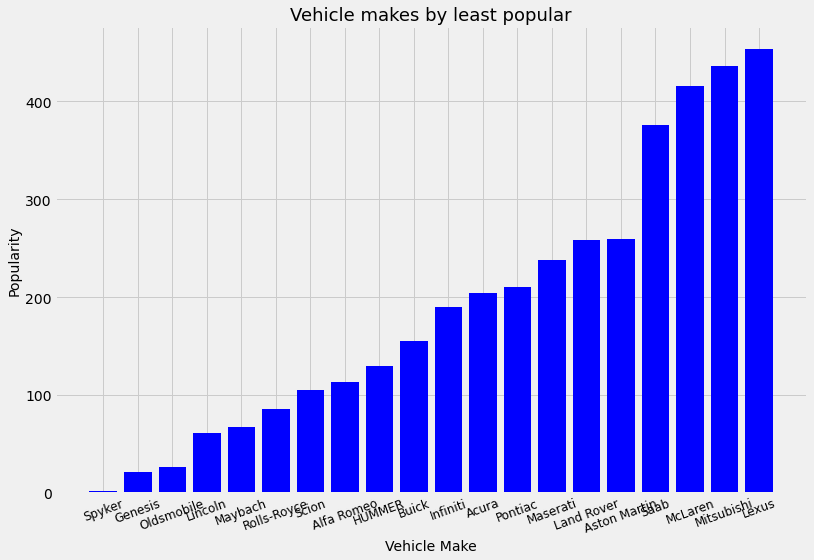

In [45]:
# chart width, height 
plt.figure(figsize=(12, 8))
#barplot
plt.bar(x =not_popular['make'], height = not_popular['popularity'], color = 'blue');
#rotate tick marks
#add rotation in degrees
plt.xticks(rotation = 20, size = 12);
# title
plt.title('Vehicle makes by least popular', size = 18);
plt.xlabel('Vehicle Make', size = 14);
plt.ylabel('Popularity', size = 14);
#plt.savefig('Images/not_popular_bar.jpg', bbox_inches="tight")

In [46]:
df.make.value_counts()

Chevrolet        1083
Ford              824
Toyota            716
Volkswagen        568
Nissan            551
Dodge             527
GMC               478
Honda             433
Mazda             412
Cadillac          396
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               229
Mitsubishi        208
Lexus             202
Buick             190
Chrysler          185
Pontiac           178
Lincoln           160
Land Rover        139
Porsche           136
Oldsmobile        130
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            69
FIAT               62
Scion              60
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Genesis   

Looking at the two charts below we can see that vehicles with prices in the millions tended to stay under 2,000 popularity. Not many people can afford million dollar car payments so this is to be expected. Meanwhile our vehicles with a popularity of over 3,000 tend to have a max price of around 200,000 or less with our most popular vehicles staying around 70,000 or less. 

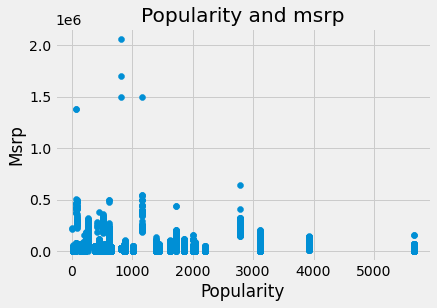

<Figure size 432x288 with 0 Axes>

In [54]:
# scatter plot of popularity and msrp
plt.scatter(imputed_df.popularity, imputed_df.msrp)
plt.title("Popularity and msrp")
plt.xlabel("Popularity")
plt.ylabel("Msrp")
plt.show();
#plt.savefig('Images/scatter_one_mil.jpg', bbox_inches="tight")

In [55]:
# dataframe of cars below 500,000 msrp for readability
below_million = imputed_df[imputed_df['msrp'] < 500000]

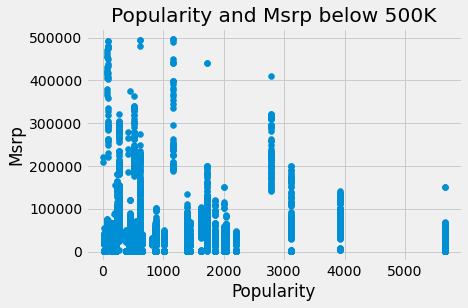

<Figure size 432x288 with 0 Axes>

In [56]:
# scatter plot of vehicles below 500k msrp
plt.scatter(below_million.popularity, below_million.msrp)
plt.title("Popularity and Msrp below 500K")
plt.xlabel("Popularity")
plt.ylabel("Msrp")
plt.show();
#plt.savefig('Images/scatter_below_500K.jpg', bbox_inches="tight")

___

## Modeling

Now that the data is trimmed down a bit it's time to try out a model. The null model to beat is an RMSE of 1445. At this stage the model appears to not be performing well. This is most likely because 86 features is still way to many and this is causing the models to pick up on to much noise in the data. An R2 score of 99 on train and testing data is highly unlikely. 

In [50]:
# features to predict on
X = imputed_df.drop(columns='popularity')

# target variable 
y = imputed_df.popularity

# setting up train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.20,
                                                    random_state=42)
# instantiate scaling
ss = StandardScaler()

# scaling features for train and test
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [51]:
# Calculating null rmse
y_bar = np.mean(y)

null_rmse = np.mean((y - y_bar)**2)

np.sqrt(null_rmse)

1445.6989856422588

In [52]:
# instantiating lasso model 
lasso = Lasso(alpha=.1)

# fitting lasso model 
lasso.fit(Z_train, y_train)

Lasso(alpha=0.1)

In [53]:
# scoring training set
lasso.score(Z_train, y_train)

0.9999907210743813

In [54]:
# scoring testing set 
lasso.score(Z_test, y_test)

0.9999905274072728

In [55]:
# generating predictions
pred_test_lasso= lasso.predict(Z_test)
# printing rmse score
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 


4.5867577593469235


In [56]:
# creating dataframe of coefficients
lasso_coef_df = pd.DataFrame(lasso.coef_, X.columns, columns=['coef_values'])

Even though the first model did not perform as intended it's still worth checking out the coefficients. According to our model the feature that is seeing the most moves in popularity is the "make" feature. This makes sense as typically people go to car lot's with a preferred brand in mind.   

In [57]:
# checking the positive coefs
lasso_coef_df.sort_values(by='coef_values', ascending=False).head()

,coef_values
make_Ford,1400.293178
make_BMW,599.423612
make_Audi,490.173772
make_Toyota,440.653702
make_Nissan,385.139484
make_Honda,376.019659
make_Chevrolet,339.300345
make_Dodge,338.945126
make_Cadillac,251.571533
make_Kia,212.916929


In [58]:
# checking the negative coefs
lasso_coef_df.sort_values(by='coef_values', ascending=True).head()

,coef_values
make_Oldsmobile,-22.083435
make_Lincoln,-20.490484
make_Buick,-10.177875
make_Scion,-9.717835
make_Rolls-Royce,-7.842004


In [59]:
# checking zeroed coefs 
lasso_coef_df[lasso_coef_df['coef_values'] == 0].head()

,coef_values
engine_hp,0.0
engine_cylinders,-0.0
number_of_doors,-0.0
highway_mpg,0.0
engine_fuel_type_electric,0.0


___

Based off of the coefficients from the first model I am going to narrow the features that we are placing into our models. This time I will be doing a lasso, ridge, standard linear model and a regression tree to see how they all perform. Although I've noted that the make of the vehicle is important I will be dropping this feature from the models. My reasoning behind this is that this feature adds 48 columns to our dataset and it will artificially inflate our model scores and cause overfitting. 

In [60]:
# list of columns to drop
feature_list = [col for col in imputed_df if col.startswith("make") or col.startswith("popularity")]
            

In [61]:
# features to predict on
X = imputed_df.drop(columns=feature_list)
                    

# target variable 
y = imputed_df.popularity

# setting up train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.20,
                                                    random_state=42)


# instantiate scaling
ss = StandardScaler()

# scaling features for train and test
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)



In [62]:
# instantiate linear regression
lr = LinearRegression()
# fitting linear model
lr.fit(Z_train, y_train)

LinearRegression()

In [63]:
print("Linear train score", lr.score(Z_train, y_train))

Linear train score 0.1335891590625513


In [64]:
print("Linear test score",lr.score(Z_test, y_test))

Linear test score 0.1350869523733642


In [65]:
# generating predictions
pred_test_lr = lr.predict(Z_test)
# printing rmse score
print("Linear RMSE", np.sqrt(mean_squared_error(y_test,pred_test_lr))) 


Linear RMSE 1385.9820190895482


In [66]:
# Ridge Model
pipe_ridge = Pipeline([
    ('ss', StandardScaler()),
    ('Ridge', Ridge())
])

# fitting ridge model
pipe_ridge.fit(X_train, y_train)

# Lasso Model 
pipe_lasso = Pipeline([
    ('ss', StandardScaler()),
    ('Lasso', Lasso())
])

# fitting lasso model
pipe_lasso.fit(X_train, y_train)


Pipeline(steps=[('ss', StandardScaler()), ('Lasso', Lasso())])

In [67]:
# parameters for ridge model
params_ridge = {
'Ridge__alpha':[5, 50, 100, 500],
'Ridge__random_state': [42]    
}

# instantiate gridsearch on ridge model
grid_ridge = GridSearchCV(pipe_ridge, param_grid=params_ridge, cv=5, n_jobs=-1)

# fit gridsearch on ridge model
grid_ridge.fit(X_train, y_train)
print(' Ridge Model Score '.center(40, '-'))
print(f'Parameter: \t{grid_ridge.best_params_}')
print(f'Train Score: \t{grid_ridge.score(X_train, y_train):.4f}')
print(f'Test Score: \t{grid_ridge.score(X_test, y_test):.4f}')
print('\n')

---------- Ridge Model Score -----------
Parameter: 	{'Ridge__alpha': 5, 'Ridge__random_state': 42}
Train Score: 	0.1336
Test Score: 	0.1353




In [68]:
# generating predictions
pred_test_ridge= grid_ridge.predict(X_test)
# printing rmse score
print("Ridge RMSE", np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 


Ridge RMSE 1385.8341293722208


In [69]:
# parameters for lasso model
l_alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1]
params_lasso = {
'Lasso__alpha':l_alphas,
'Lasso__random_state': [42]   
}
# fit gridsearch on Lasso model 
grid_lasso = GridSearchCV(pipe_lasso, param_grid=params_lasso, cv=5, n_jobs=-1)
grid_lasso.fit(X_train, y_train)
print(' Lasso Model Score '.center(40, '-'))
print(f'Parameter: \t{grid_lasso.best_params_}')
print(f'Train Score: \t{grid_lasso.score(X_train, y_train):.4f}')
print(f'Test Score: \t{grid_lasso.score(X_test, y_test):.4f}')
print('\n')

---------- Lasso Model Score -----------
Parameter: 	{'Lasso__alpha': 0.3, 'Lasso__random_state': 42}
Train Score: 	0.1336
Test Score: 	0.1356




In [70]:
# generating predictions
pred_test_lasso= grid_lasso.predict(X_test)
# printing rmse score
print("Lasso RMSE", np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 


Lasso RMSE 1385.5655872912193


In [71]:
# Random Forest Regressor
pipe_regression_tree = Pipeline([
    
    ('RfR', RandomForestRegressor())
])

# fitting ridge model
pipe_regression_tree.fit(X_train, y_train)

Pipeline(steps=[('RfR', RandomForestRegressor())])

In [72]:
# parameters for tree model
est = [10, 20, 100, 200, 300]


# tree params
params_regression_tree = {
'RfR__n_estimators':est,
'RfR__random_state': [42]
}

# instantiate gridsearch on tree model
grid_regression_tree = GridSearchCV(pipe_regression_tree,
                                    param_grid=params_regression_tree, 
                                    cv=5, 
                                    n_jobs=-1)
                                   

# fit gridsearch on tree model
grid_regression_tree.fit(X_train, y_train)
print(' Tree Model Score '.center(40, '-'))
print(f'Parameter: \t{grid_regression_tree.best_params_}')
print(f'Train Score: \t{grid_regression_tree.score(X_train, y_train):.4f}')
print(f'Test Score: \t{grid_regression_tree.score(X_test, y_test):.4f}')
print('\n')

----------- Tree Model Score -----------
Parameter: 	{'RfR__n_estimators': 200, 'RfR__random_state': 42}
Train Score: 	0.9809
Test Score: 	0.8764




In [73]:
# generating predictions
pred_test_tree= grid_regression_tree.predict(X_test)
# printing rmse score
print("Tree RMSE", np.sqrt(mean_squared_error(y_test,pred_test_tree))) 


Tree RMSE 524.03497563289


## Model Evaluation and Analysis

The ridge, lasso, linear models all performed poorly on the dataset. However the regression tree seems to have a decent performance. It is overfitting which is fairly common with modeling a random forest. We could possibly improve on this model by tweaking the hyperparameters more and possibly condensing our data further. However in it's current state it is beating the null model in RMSE by a large margin and it performed with 87 percent confidence on the testing data. 

|Model|Train Score|Test Score|RMSE|
|---|---|---|---|
|**Null**|NA|NA|1445.6989|
|**1st Lasso Model**|0.9999|0.9999|4.1932|
|**2nd Lasso Model**|0.1347|0.1331|1385.5655|
|**Linear Model**|0.1335|0.1350|1385.9820|
|**Ridge Model**|0.1336|0.1353|1385.8341|
|**Regression Tree Model**|0.9809|0.8764|524.0349



___

## Conclusion and Recommendations 

To answer my problem statement I would say based on my EDA of this dataset it appears that the feature that most affects popularity is the brand of the vehicle. Ford, Audi, and BMW seem to have the most postive affect on popularity. While Oldsmobile, Lincoln, and Buick appear to be the car brands to avoid. Knowing what vehicle brand is popular can absolutley be useful. General Makers could consider reaching out to any of the popular brands mentioned above and create a collaborative vehicle. This could help boost brand recognition as well as popularity by appealing to an already large audience. As for the features besides make there are no discernible patterns in the data that I could detect except for msrp. If a vehicle is to expensive it won't be available to the general public and won't receive as much exposure. I would also deploy my random forest model to predict the popularity of the cars as they come out. 

In the future to improve the efficacy of modeling I would recommend bringing in more outside data such as user reviews for each vehicle type or condensing the "make" feature into their parent companies to reduce the overall number of features without losing the information from that column.  I would also like to further tune the model with additional gridsearching. 
